In [96]:
import ee

In [4]:
ee.Authenticate()

In [97]:

try:
    ee.Initialize()
    print("Google Earth Engine has initialized successfully!")
except Exception as e:
    print("Failed to initialize Google Earth Engine:")
    print(e)


Google Earth Engine has initialized successfully!


In [4]:
# Load a Landsat image.
image = ee.Image('LANDSAT/LC08/C01/T1/LC08_044034_20140318')

# Print image object.
print(image)


ee.Image({
  "functionInvocationValue": {
    "functionName": "Image.load",
    "arguments": {
      "id": {
        "constantValue": "LANDSAT/LC08/C01/T1/LC08_044034_20140318"
      }
    }
  }
})


In [6]:
import folium

# Function to add EE layer to folium map.
def add_ee_layer(self, ee_image_object, vis_params, name):
    map_id_dict = ee.Image(ee_image_object).getMapId(vis_params)
    folium.raster_layers.TileLayer(
        tiles=map_id_dict['tile_fetcher'].url_format,
        attr='Map Data &copy; <a href="https://earthengine.google.com/">Google Earth Engine</a>',
        name=name,
        overlay=True,
        control=True
    ).add_to(self)

# Add EE drawing method to folium.
folium.Map.add_ee_layer = add_ee_layer

# Create a folium map object.
my_map = folium.Map(location=[20, 0], zoom_start=3)

# Set visualization parameters.
vis_params = {'min': 0, 'max': 3000, 'bands': ['B4', 'B3', 'B2']}

# Add the image layer to the map and display it.
my_map.add_ee_layer(image, vis_params, 'Landsat 8')
my_map


In [8]:
import geopandas as gpd

In [9]:
in_geojson = r'.\test_data\data\geojson\municipality.json'
in_shp = r'.\test_data\data\shp\municipality.shp'

In [10]:
gdf = gpd.read_file(in_geojson)

In [11]:
gdf.head()

OBJECTID   DISTRICT        GaPa_NaPa     Type_GN Province  SCode  DCode  \
0         1  TAPLEJUNG  Aathrai Tribeni  Gaunpalika        1      1      1   
1         2  TAPLEJUNG       Maiwakhola  Gaunpalika        1      1      1   
2         3  TAPLEJUNG        Meringden  Gaunpalika        1      1      1   
3         4  TAPLEJUNG       Mikwakhola  Gaunpalika        1      1      1   
4         5  TAPLEJUNG     Phaktanglung  Gaunpalika        1      1      1   

   SDD  MCode      length         area  SDDMM          Nepali  Shape_Leng  \
0  101      1   44.672747    88.825948  10101  आठराई त्रिवेणी    0.430900   
1  101      2   61.067429   137.848122  10102        मैवाखोला    0.577692   
2  101      3   75.987469   210.313039  10103        मेरिङदेन    0.718499   
3  101      4  123.175400   442.960328  10104      मिक्वाखोला    1.164097   
4  101      5  228.107830  1858.441119  10105       फक्ताङलुङ    2.186142   

   Shape_Area                                           geometry  
0    0.008075  POLYGON ((87.62191 27.36245, 87.62137 27.36272...  
1    0.012540  POLYGON ((87.60599 27.37125, 87.60364 27.37219...  
2    0.019148  POLYGON ((87.62728 27.37689, 87.62691 27.37773...  
3    0.040365  POLYGON ((87.68465 27.40857, 87.67857 27.40784...  
4    0.169452  POLYGON ((88.14827 27.70202, 88.14733 27.70302...

In [12]:
gdf = gpd.read_file(in_shp)

In [13]:
gdf.head()

OBJECTID   DISTRICT        GaPa_NaPa     Type_GN Province  SCode  DCode  \
0         1  TAPLEJUNG  Aathrai Tribeni  Gaunpalika        1      1      1   
1         2  TAPLEJUNG       Maiwakhola  Gaunpalika        1      1      1   
2         3  TAPLEJUNG        Meringden  Gaunpalika        1      1      1   
3         4  TAPLEJUNG       Mikwakhola  Gaunpalika        1      1      1   
4         5  TAPLEJUNG     Phaktanglung  Gaunpalika        1      1      1   

   SDD  MCode      length         area  SDDMM  \
0  101      1   44.672747    88.825948  10101   
1  101      2   61.067429   137.848122  10102   
2  101      3   75.987469   210.313039  10103   
3  101      4  123.175400   442.960328  10104   
4  101      5  228.107830  1858.441119  10105   

                                     Nepali  Shape_Leng  Shape_Area  \
0  à¤à¤ à¤°à¤¾à¤ à¤¤à¥à¤°à¤¿à¤µà¥à¤£à¥    0.430900    0.008075   
1                  à¤®à¥à¤µà¤¾à¤à¥à¤²à¤¾    0.577692    0.012540   
2                  à¤®à¥à¤°à¤¿à¤à¤¦à¥à¤¨    0.718499    0.019148   
3            à¤®à¤¿à¤à¥à¤µà¤¾à¤à¥à¤²à¤¾    1.164097    0.040365   
4               à¤«à¤à¥à¤¤à¤¾à¤à¤²à¥à¤    2.186142    0.169452   

                                            geometry  
0  POLYGON ((87.60718 27.37074, 87.60840 27.36974...  
1  POLYGON ((87.50136 27.42931, 87.50406 27.42861...  
2  POLYGON ((87.51006 27.56923, 87.50928 27.56793...  
3  POLYGON ((87.68623 27.70966, 87.68668 27.70899...  
4  POLYGON ((87.83464 27.95145, 87.83568 27.95148...

In [14]:
from shapely.geometry import Point, LineString, Polygon

In [15]:
point1 = Point(2.2, 4.2)
point2 = Point(9.26, -2.456, 0.57)

In [16]:
print(point1)

POINT (2.2 4.2)


In [19]:
print(point2)

POINT Z (9.26 -2.456 0.57)


In [20]:
point_coords = point1.coords

In [21]:
print(point_coords)

In [22]:
xy = point_coords.xy
x = point1.x
y = point1.y

In [24]:
print(xy)
print(type(x))
print(y)

(array('d', [2.2]), array('d', [4.2]))
<class 'numpy.float64'>
4.2


In [25]:
point3 = Point(7.2, -25.1)

In [29]:
point1.distance(point3)

29.723559679150142

In [33]:
# Let's create a bounding box of the world and make a whole in it
# First we define our exterior
world_exterior = [(-180, 90), (-180, -90), (180, -90), (180, 90)]

# Let's create a single big hole where we leave ten decimal degrees at the boundaries of the world
# Notice: there could be multiple holes, thus we need to provide a list of holes
hole = [[(-170, 80), (-170, -80), (170, -80), (170, 80)]]

# World without a hole
world = Polygon(shell=world_exterior)

# Now we can construct our Polygon with the hole inside
world_has_a_hole = Polygon(shell=world_exterior, holes=hole)

In [34]:
print(world)
print(world_has_a_hole)
type(world_has_a_hole)

POLYGON ((-180 90, -180 -90, 180 -90, 180 90, -180 90))
POLYGON ((-180 90, -180 -90, 180 -90, 180 90, -180 90), (-170 80, -170 -80, 170 -80, 170 80, -170 80))


shapely.geometry.polygon.Polygon

In [3]:
import ee

In [4]:
ee.Initialize()

In [5]:
#Load a Landsat image
Landsat8 = ee.Image('LANDSAT/LC08/C01/T1_TOA/LC08_170052_20170108')\
.select('B4','B3','B2')

#Create region
region = ee.Geometry.Rectangle(37.07, 11.50, 37.39, 11.82)

In [6]:
print(Landsat8)

ee.Image({
  "functionInvocationValue": {
    "functionName": "Image.select",
    "arguments": {
      "bandSelectors": {
        "constantValue": [
          "B4",
          "B3",
          "B2"
        ]
      },
      "input": {
        "functionInvocationValue": {
          "functionName": "Image.load",
          "arguments": {
            "id": {
              "constantValue": "LANDSAT/LC08/C01/T1_TOA/LC08_170052_20170108"
            }
          }
        }
      }
    }
  }
})


In [7]:
task = ee.batch.Export.image.toDrive(**{
    'image': Landsat8,
    'description': 'imagetoDriveExample',
    'folder': 'Example_folder',
    'scale': 30,
    'region': region.getInfo()['coordinates']
})
task.start()

In [38]:
geometry = ee.Geometry.Point(([31.5051, -26.6061]))

location = geometry.coordinates().getInfo()[::-1]

s2 = ee.ImageCollection('COPERNICUS/S2_HARMONIZED')
rgbVis = {
    'min': 0.0,
    'max': 3000,
    'bands': ['B4', 'B3', 'B2'],
}

#Write a function for cloud masking
def maskS2clouds(image):
    qa = image.select('QA60')
    cloudBitMask = 1 << 10
    cirrusBitMask = 1 << 11
    mask = qa.bitwiseAnd(cloudBitMask).eq(0).And(qa.bitwiseAnd(cirrusBitMask).eq(0))
    return image.updateMask(mask).select('B.*').copyProperties(image, ['system:time_start'])

filtered = s2.filter(ee.Filter.date('2020-01-01', '2020-05-01')) \
                .filter(ee.Filter.lt('CLOUD_PIXEL_PERCENTAGE', 30)) \
                .filter(ee.Filter.bounds(geometry)) \
                .map(maskS2clouds)

# Write a function that calculates the NDVI for an image and adds it as a band
def addNDVI(image):
    ndvi = image.normalizedDifference(['B8', 'B4']).rename('ndvi')
    return image.addBands(ndvi)

withNDVI = filtered.map(addNDVI)
median = withNDVI.median()

In [39]:
# Import the folium library
import folium

# Define a method for dispalying earth engine image tiles to folium map.
def addLayer(self, ee_image_object, vis_params, name):
    map_id_dict = ee.Image(ee_image_object).getMapId(vis_params)
    folium.raster_layers.TileLayer(
        tiles = map_id_dict['tile_fetcher'].url_format,
        attr = 'Map Data &copy; <a href = "https://earthengine.google.com/">Google Earth Engine</a>',
        name = name,
        overlay = True,
        control = True
    ).add_to(self)

# Add EE drawing method to folium
folium.Map.addLayer = addLayer

# Create the map object
Map = folium.Map(location = location, zoom_start = 10)

In [ ]:
Map.addLayer(median, rgbVis, 'Sentinel')

# Add a layer control panel to the map
Map.add_child(folium.LayerControl())

# Display the map
display(Map)

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image
import urllib.request
# Get the URL for the median image
url = median.getThumbURL({
    'min': 0.0,
    'max': 255,
    'bands': ['B4', 'B3', 'B2'],
    'dimensions': 512  # Reduce dimensions if necessary
})

# Use Pillow and urllib to open the image from the URL
with urllib.request.urlopen(url) as url_response:
    image = Image.open(url_response)
    image = np.array(image)

# Use matplotlib to display the image
plt.imshow(image)
plt.axis('off')
plt.show()


In [35]:
print(filtered.size().getInfo())

0


In [47]:
# Sample ROIs - You need to define 100 such ROIs
rois = {
    'Region1': ee.Geometry.Rectangle([-70.5, -33.5, -70.4, -33.4]),  # Example coordinates
    'Region2': ee.Geometry.Rectangle([12.4, 41.8, 12.5, 41.9]),
    # ... Add more ROIs
}

def maskS2clouds(image):
    qa = image.select('QA60')
    cloudBitMask = 1 << 10
    cirrusBitMask = 1 << 11
    mask = qa.bitwiseAnd(cloudBitMask).eq(0).And(qa.bitwiseAnd(cirrusBitMask).eq(0))
    return image.updateMask(mask).select('B.*').copyProperties(image, ['system:time_start'])

def preprocess_images(region_name, geometry):
    collection = ee.ImageCollection('COPERNICUS/S2') \
        .filterBounds(geometry) \
        .filterDate('2020-01-01', '2020-12-31') \
        .map(maskS2clouds) \
        .select(['B4', 'B3', 'B2'])  # Select RGB bands

    processed_image = collection.median()

    export_image(processed_image, region_name)

def export_image(image, region_name):
    task = ee.batch.Export.image.toDrive(
        image=image,
        description=f'{region_name}_export',
        folder='EarthEngineImages',
        fileNamePrefix=region_name,
        scale=30,  # 10 meters per pixel
        region=image.geometry().getInfo()['coordinates'],
        #fileFormat='GeoTIFF'
    )
    task.start()


In [48]:
for region_name, geometry in rois.items():
    preprocess_images(region_name, geometry)

In [46]:
import rasterio
import matplotlib.pyplot as plt

# Replace this with the path to your .tif file
tif_file = './Region1-0001994496-0000000000.tif'

# Open the .tif file
with rasterio.open(tif_file) as src:
    # Read the image data
    image = src.read()

    # If the image has multiple bands, select the bands you wish to visualize
    # For example, for an RGB image, you might use bands 1, 2, and 3
    if image.shape[0] > 1:
        # Adjust the indices based on how your image is structured
        image_to_show = image[[0, 1, 2], :, :]  # Change band indices as needed
    else:
        image_to_show = image

    # Visualize the image
    plt.imshow(image_to_show.transpose((1, 2, 0)))
    plt.axis('off')  # Turn off axis numbers and labels
    plt.show()


c:\Users\HI\anaconda3\envs\geospatialai\lib\site-packages\matplotlib\cm.py:478: RuntimeWarning: invalid value encountered in cast
  xx = (xx * 255).astype(np.uint8)


In [ ]:
import geemap
dataset = ee.ImageCollection('LANDSAT/LC08/C02/T1_L2').filterDate(
    '2021-05-01', '2021-06-01'
)


# Applies scaling factors.
def apply_scale_factors(image):
  optical_bands = image.select('SR_B.').multiply(0.0000275).add(-0.2)
  thermal_bands = image.select('ST_B.*').multiply(0.00341802).add(149.0)
  return image.addBands(optical_bands, None, True).addBands(
      thermal_bands, None, True
  )


dataset = dataset.map(apply_scale_factors)

visualization = {
    'bands': ['SR_B4', 'SR_B3', 'SR_B2'],
    'min': 0.0,
    'max': 0.3,
}

m = geemap.Map()
m.set_center(-114.2579, 38.9275, 8)
m.add_layer(dataset, visualization, 'True Color (432)')
display(m)

Map(center=[38.9275, -114.2579], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=Search…

In [98]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from PIL import Image
import rasterio as rio

In [5]:
train = pd.read_csv('./EuroSAT/train.csv')

In [6]:
train.head()

Unnamed: 0                                           Filename  Label  \
0       16257                      AnnualCrop/AnnualCrop_142.jpg      0   
1        3297  HerbaceousVegetation/HerbaceousVegetation_2835...      2   
2       17881               PermanentCrop/PermanentCrop_1073.jpg      6   
3        2223                      Industrial/Industrial_453.jpg      4   
4        4887  HerbaceousVegetation/HerbaceousVegetation_1810...      2   

              ClassName  
0            AnnualCrop  
1  HerbaceousVegetation  
2         PermanentCrop  
3            Industrial  
4  HerbaceousVegetation

In [9]:
path = r'./EuroSAT/'+str(train["Filename"][0])
print(path)

./EuroSAT/AnnualCrop/AnnualCrop_142.jpg


In [12]:
with Image.open(path) as img:
    img_array = np.array(img)

print(img_array.shape)

(64, 64, 3)


In [18]:
with rio.open('./HRSCD/change/D35/35-2012-0350-6765-LA93-0M50-E080.tif') as src:
    img = src.read()
    img = np.array(img)

print(img.shape)

(1, 10000, 10000)


In [21]:
num_zeros = np.count_nonzero(img == 0)

# Counting ones
num_ones = np.count_nonzero(img == 1)

print("Number of zeros:", num_zeros)
print("Number of ones:", num_ones)

Number of zeros: 99022598
Number of ones: 977402


In [22]:
with rio.open('./HRSCD/2006/D14/14-2005-0415-6890-LA93.tif') as src:
    image = src.read()
    image = np.array(image)

print(image.shape)

(3, 10000, 10000)


In [27]:
with rio.open('./OSCd/Onera Satellite Change Detection dataset - Train Labels/bercy/cm/bercy-cm.tif') as src:
    im1 = src.read()
    im1 = np.array(im1)

print(im1.shape)

(1, 395, 360)


c:\Users\HI\anaconda3\envs\geospatialai\lib\site-packages\rasterio\__init__.py:331: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


In [28]:
geometry = ee.Geometry.Point(([31.5051, -26.6061]))

location = geometry.coordinates().getInfo()[::-1]

s2 = ee.ImageCollection('COPERNICUS/S2_HARMONIZED')
rgbVis = {
    'min': 0.0,
    'max': 3000,
    'bands': ['B4', 'B3', 'B2'],
}

#Write a function for cloud masking
def maskS2clouds(image):
    qa = image.select('QA60')
    cloudBitMask = 1 << 10
    cirrusBitMask = 1 << 11
    mask = qa.bitwiseAnd(cloudBitMask).eq(0).And(qa.bitwiseAnd(cirrusBitMask).eq(0))
    return image.updateMask(mask).select('B.*').copyProperties(image, ['system:time_start'])

filtered = s2.filter(ee.Filter.date('2020-01-01', '2020-05-01')) \
                .filter(ee.Filter.lt('CLOUD_PIXEL_PERCENTAGE', 30)) \
                .filter(ee.Filter.bounds(geometry)) \
                .map(maskS2clouds)

# Write a function that calculates the NDVI for an image and adds it as a band
def addNDVI(image):
    ndvi = image.normalizedDifference(['B8', 'B4']).rename('ndvi')
    return image.addBands(ndvi)

withNDVI = filtered.map(addNDVI)
median = withNDVI.median()

In [29]:
image_ids = withNDVI.aggregate_array('system:index').getInfo()
print(len(image_ids))

0


In [141]:
rois = {
    'Tokyo': ee.Geometry.Rectangle([139.5, 35.5, 140, 36]),
    'Loire Valley': ee.Geometry.Rectangle([0.5, 47.5, 1.5, 48.5]),
    'Okanagan Valley': ee.Geometry.Rectangle([-120, 49, -119, 50]),
    'Sundarbans': ee.Geometry.Rectangle([88.5, 21.5, 89.5, 22.5]),
    'Yangtze River Basin': ee.Geometry.Rectangle([115, 30, 116, 31]),
    'Kruger National Park': ee.Geometry.Rectangle([31, -25, 32, -24]),
    'New York City': ee.Geometry.Rectangle([-74.05, 40.70, -73.85, 40.85]),
    'Okavango Delta': ee.Geometry.Rectangle([22.4, -19.4, 22.9, -19.1]),
    'Patagonia': ee.Geometry.Rectangle([-73, -50, -72, -49]),
    'Venice': ee.Geometry.Rectangle([12.3, 45.4, 12.5, 45.5]),
    'Banff National Park': ee.Geometry.Rectangle([-116.5, 51, -115.5, 51.5]),
    'Provence': ee.Geometry.Rectangle([5.2, 43.8, 5.4, 44]),
    'Mekong Delta': ee.Geometry.Rectangle([105.5, 10, 106, 10.5]),
    'Masai Mara': ee.Geometry.Rectangle([34.8, -1.5, 35.3, -1]),
    'Lofoten Islands': ee.Geometry.Rectangle([13, 68, 14, 69]),
}
    # Add more regions as needed
    # Saved at 100m resolution
    #'Amazon Rainforest': ee.Geometry.Rectangle([-70, -5, -60, 0]),
    #'Sahara Desert': ee.Geometry.Rectangle([10, 20, 20, 30]),
    #'Himalayas': ee.Geometry.Rectangle([78, 28, 88, 35]),
    #'Great Barrier Reef': ee.Geometry.Rectangle([143, -24, 154, -18]),
    #'Central United States': ee.Geometry.Rectangle([-105, 35, -90, 40]),
    #'Scandinavian Forests': ee.Geometry.Rectangle([10, 60, 25, 70]),
    #'Rocky Mountains': ee.Geometry.Rectangle([-115, 37, -105, 43]),
    #'Greenland': ee.Geometry.Rectangle([-40, 80, -30, 83]),
    #'Indonesian Archipelago': ee.Geometry.Rectangle([110, -5, 120, 5]),
    # Saved at 30m resolution
    #'Nile Delta': ee.Geometry.Rectangle([30, 30, 32, 32]),
    #'California': ee.Geometry.Rectangle([-122, 36, -118, 38]),
    #'Niger River Delta': ee.Geometry.Rectangle([-5, 14, -3, 16]),
    #'Sonoran Desert': ee.Geometry.Rectangle([-113, 31, -111, 33]),
    #'Pampas': ee.Geometry.Rectangle([-63, -35, -61, -33]),
    #'Lapland': ee.Geometry.Rectangle([25, 68, 27, 70]),
    #'European Alps': ee.Geometry.Rectangle([10, 45, 13, 48])



#Write a function for cloud masking
def maskS2clouds(image):
    qa = image.select('QA60')
    cloudBitMask = 1 << 10
    cirrusBitMask = 1 << 11
    mask = qa.bitwiseAnd(cloudBitMask).eq(0).And(qa.bitwiseAnd(cirrusBitMask).eq(0))
    return image.updateMask(mask).select(['B4', 'B3', 'B2']).copyProperties(image, ['system:time_start'])

def addNDVI(image):
    ndvi = image.normalizedDifference(['B8', 'B4']).rename('ndvi')
    ndvi_scaled = ndvi.multiply(100).toInt()
    return image.addBands(ndvi_scaled)


def preprocess_upload(region_name, geometry):
    s2 = ee.ImageCollection("COPERNICUS/S2_SR_HARMONIZED")

    filtered = s2.filter(ee.Filter.date('2020-01-01', '2020-12-01')) \
                    .filter(ee.Filter.lt('CLOUDY_PIXEL_PERCENTAGE', 20)) \
                    .filter(ee.Filter.bounds(geometry)) \
                    .map(maskS2clouds)

    #withNDVI = filtered.map(addNDVI)
    median = filtered.median()
    final_image = median.toFloat()
    #print(geometry.bounds().getInfo()['coordinates'])
    """image_ids = withNDVI.aggregate_array('system:index').getInfo()
    print(len(image_ids))"""
    upload_to_drive(median, region_name, geometry)

def upload_to_drive(image, region_name, geometry):
    task = ee.batch.Export.image.toDrive(**{
        'image': image,
        'description': '{} export'.format(region_name),
        'fileNamePrefix': region_name,
        'folder': 'Example_folder',
        'scale': 10,
        'region': geometry.bounds().getInfo()['coordinates'],
        'maxPixels': 1e10
    })
    task.start()

for region_name, geometry in rois.items():
    preprocess_upload(region_name, geometry)

In [60]:
print('Data types of bands in a sample image:')
sample_image = ee.Image(filtered.first())
band_types = sample_image.bandTypes().getInfo()
for band, band_info in band_types.items():
    print(f'Band: {band}, Type: {band_info["precision"]}')


Data types of bands in a sample image:
Band: B1, Type: int
Band: B11, Type: int
Band: B12, Type: int
Band: B2, Type: int
Band: B3, Type: int
Band: B4, Type: int
Band: B5, Type: int
Band: B6, Type: int
Band: B7, Type: int
Band: B8, Type: int
Band: B8A, Type: int
Band: B9, Type: int


In [49]:
location = rois['Amazon Rainforest'].coordinates().getInfo()[::-1]

rgbVis = {
    'min': 0.0,
    'max': 3000,
    'bands': ['B4', 'B3', 'B2'],
}

In [55]:
s2 = ee.ImageCollection("COPERNICUS/S2_SR_HARMONIZED")

filtered = s2.filter(ee.Filter.date('2020-01-01', '2020-05-01')) \
                .filter(ee.Filter.lt('CLOUDY_PIXEL_PERCENTAGE', 20)) \
                .filter(ee.Filter.bounds(rois['Amazon Rainforest'])) \
                .map(maskS2clouds)

withNDVI = filtered.map(addNDVI)
median = withNDVI.median()

In [56]:
# Import the folium library
import folium

# Define a method for dispalying earth engine image tiles to folium map.
def addLayer(self, ee_image_object, vis_params, name):
    map_id_dict = ee.Image(ee_image_object).getMapId(vis_params)
    folium.raster_layers.TileLayer(
        tiles = map_id_dict['tile_fetcher'].url_format,
        attr = 'Map Data &copy; <a href = "https://earthengine.google.com/">Google Earth Engine</a>',
        name = name,
        overlay = True,
        control = True
    ).add_to(self)

# Add EE drawing method to folium
folium.Map.addLayer = addLayer

# Create the map object
centroid = rois['Amazon Rainforest'].centroid().getInfo()['coordinates']

# Create a folium map centered on the centroid
Map = folium.Map(location=centroid[::-1], zoom_start=6)

Map.addLayer(median, rgbVis, 'Sentinel')

# Add a layer control panel to the map
Map.add_child(folium.LayerControl())

# Display the map
display(Map)

In [65]:
with rio.open('./Sahara Desert.tif') as src:
    im2 = src.read()
    im2 = np.array(im2)

print(im2.shape)

(3, 11344, 11133)


In [124]:
import rasterio
from rasterio.windows import Window
import numpy as np
import imageio
from PIL import Image
import os

def get_image_name_without_extension(image_path):
    # Get the base name of the image file (e.g., 'image.tif' from '/path/to/image.tif')
    base_name = os.path.basename(image_path)

    # Split the base name into name and extension and return just the name
    image_name = os.path.splitext(base_name)[0]
    
    return image_name

def break_into_patches_and_save(image_path, patch_size, output_folder, missing_data_threshold=0.5):
    """
    Break an image into patches and save them, excluding patches with too much missing data.

    :param image_path: Path to the image file.
    :param patch_size: Size of the patches (e.g., 1024).
    :param output_folder: Folder where patches will be saved.
    :param missing_data_threshold: Fraction of missing data in a patch to exclude it.
    """

    image_name = get_image_name_without_extension(image_path)
    count = 0

    with rasterio.open(image_path) as src:
        for j in range(0, src.height, patch_size):
            for i in range(0, src.width, patch_size):
                window = Window(i, j, patch_size, patch_size)
                if src.height - j < patch_size or src.width - i < patch_size:
                    continue  # Skip incomplete patches

                patch = src.read(window=window)

                # Calculate the fraction of missing data in the patch
                missing_data_fraction = np.count_nonzero(patch == 0) / patch.size

                # Skip patch if missing data exceeds threshold
                if missing_data_fraction > missing_data_threshold:
                    continue

                # Save the patch
                patch_filename = f'{output_folder}/{image_name}_patch_{j}{i}.png'
                # Handle the case where max and min are equal
                if patch.max() == patch.min():
                    # Skip this patch or set to a default value, e.g., all zeros
                    continue

                # Normalization
                patch = np.nan_to_num(patch)
                patch_normalized = ((patch - patch.min()) / (patch.max() - patch.min()) * 255)

                # Handle NaN values
                patch_normalized = patch_normalized.astype(np.uint8)
                pil_image = Image.fromarray(patch_normalized.transpose(1, 2, 0))
                pil_image.save(patch_filename)
                count += 1
                #imageio.imwrite(patch_filename, patch_normalized.transpose(1, 2, 0))

    print("Total number of images generated is {}".format(count))


In [175]:
image_path = r'./Sentinel 2 scenes/2/Yangtze River Basin.tif'
patch_size = 1024
output_folder = r'./Sentinel 2 images'
break_into_patches_and_save(image_path, patch_size, output_folder)

Total number of images generated is 100


(11152, 11133, 3)
[0.16501652 0.10998848 0.07318473]


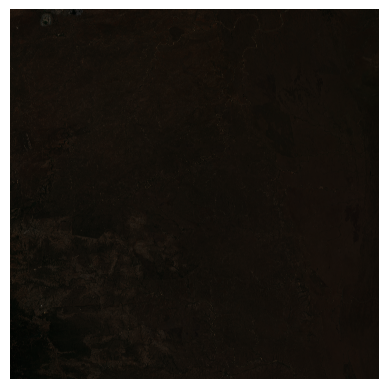

In [161]:
import matplotlib.pyplot as plt
with rio.open('./Sentinel 2 scenes/2/Kruger National Park.tif') as src:
    im2 = src.read()
    im2 = np.array(im2)

im2 = np.nan_to_num(im2)
im2 = (im2 - im2.min()) / (im2.max() - im2.min())
im2 = im2.transpose(1, 2, 0)
print(im2.shape)
print(im2[0,0])
plt.imshow(im2)
plt.axis('off')  # To not show axis values
plt.show()

RGB
Min value in the image: 0.0
Max value in the image: 1.0


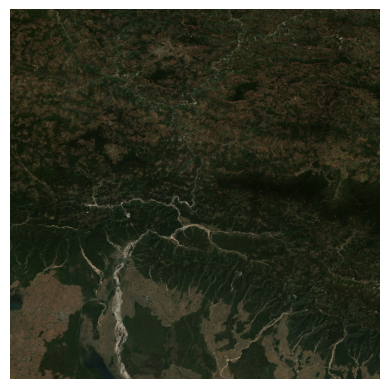

In [140]:
from PIL import Image
import numpy as np

# Load the image using Pillow
image_path = './Sentinel 2 images/Himalayas_patch_61442048.png'
image = Image.open(image_path)

print(image.mode)
# Ensure it's in RGB mode
if image.mode != 'RGB':
    image = image.convert('RGB')

# Rearrange the channels and convert to numpy array
img_array = (np.array(image))/255

# Print min and max values
print('Min value in the image:', img_array.min())
print('Max value in the image:', img_array.max())

plt.imshow(image)
plt.axis('off')  # To not show axis values
plt.show()


In [1]:
import os
from PIL import Image
import torch
from torchvision import transforms
from torch.utils.data import Dataset

class CustomImageDataset(Dataset):
    def __init__(self, img_dir, transform=None):
        self.img_dir = img_dir
        self.transform = transform
        self.img_names = [f for f in os.listdir(img_dir) if os.path.isfile(os.path.join(img_dir, f))]

    def __len__(self):
        return len(self.img_names)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_names[idx])
        image = Image.open(img_path).convert('RGB')
        if self.transform:
            image = self.transform(image)
        return image

In [2]:
from sklearn.model_selection import train_test_split

# Assuming your images are in './images' directory
img_dir = './Sentinel 2 images'
dataset = CustomImageDataset(img_dir)

# Split dataset into train, validation, and test sets
train_idx, val_test_idx = train_test_split(list(range(len(dataset))), test_size=0.4, random_state=42)
val_idx, test_idx = train_test_split(val_test_idx, test_size=0.5, random_state=42)

train_dataset = torch.utils.data.Subset(dataset, train_idx)
val_dataset = torch.utils.data.Subset(dataset, val_idx)
test_dataset = torch.utils.data.Subset(dataset, test_idx)

In [3]:
transform = transforms.Compose([
    transforms.Resize((512, 512)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Apply transformations to datasets
dataset.transform = transform

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(512, 512, 3)


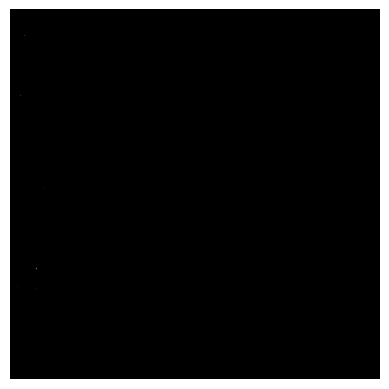

In [4]:
import matplotlib.pyplot as plt
arr = dataset[10].numpy()
arr = arr.transpose(1, 2, 0)
print(arr.shape)
plt.imshow(arr)
plt.axis('off')  # To not show axis values
plt.show()

In [4]:
from torch.utils.data import DataLoader

batch_size = 32  # Adjust as per your requirement

#train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [189]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class Encoder_huge(nn.Module):
    def __init__(self):
        super(Encoder_huge, self).__init__()
        self.conv1 = nn.Conv2d(3, 64, kernel_size=4, stride=2, padding=1)  # 64 x 512 x 512
        self.bn1 = nn.BatchNorm2d(64)
        self.conv2 = nn.Conv2d(64, 128, kernel_size=4, stride=2, padding=1)  # 128 x 256 x 256
        self.bn2 = nn.BatchNorm2d(128)
        self.conv3 = nn.Conv2d(128, 256, kernel_size=4, stride=2, padding=1)  # 256 x 128 x 128
        self.bn3 = nn.BatchNorm2d(256)
        self.conv4 = nn.Conv2d(256, 512, kernel_size=4, stride=2, padding=1)  # 512 x 64 x 64
        self.bn4 = nn.BatchNorm2d(512)
        self.conv5 = nn.Conv2d(512, 1024, kernel_size=4, stride=2, padding=1)  # 1024 x 32 x 32
        self.bn5 = nn.BatchNorm2d(1024)
        
        # The output of conv5 would be [batch_size, 1024, 32, 32]
        # Flatten the output for the fully connected layers
        self.fc_mu = nn.Linear(1024 * 32 * 32, 2048)
        self.fc_logvar = nn.Linear(1024 * 32 * 32, 2048)

    def forward(self, x):
        x = F.relu(self.bn1(self.conv1(x)))
        x = F.relu(self.bn2(self.conv2(x)))
        x = F.relu(self.bn3(self.conv3(x)))
        x = F.relu(self.bn4(self.conv4(x)))
        x = F.relu(self.bn5(self.conv5(x)))
        x = torch.flatten(x, start_dim=1)
        mu = self.fc_mu(x)
        logvar = self.fc_logvar(x)
        return mu, logvar


class Decoder_huge(nn.Module):
    def __init__(self):
        super(Decoder_huge, self).__init__()
        self.fc = nn.Linear(2048, 1024 * 32 * 32)
        
        self.deconv1 = nn.ConvTranspose2d(1024, 512, kernel_size=4, stride=2, padding=1)
        self.bn1 = nn.BatchNorm2d(512)
        self.deconv2 = nn.ConvTranspose2d(512, 256, kernel_size=4, stride=2, padding=1)
        self.bn2 = nn.BatchNorm2d(256)
        self.deconv3 = nn.ConvTranspose2d(256, 128, kernel_size=4, stride=2, padding=1)
        self.bn3 = nn.BatchNorm2d(128)
        self.deconv4 = nn.ConvTranspose2d(128, 64, kernel_size=4, stride=2, padding=1)
        self.bn4 = nn.BatchNorm2d(64)
        self.deconv5 = nn.ConvTranspose2d(64, 3, kernel_size=4, stride=2, padding=1)
        self.bn5 = nn.BatchNorm2d(3)

    def forward(self, z):
        z = self.fc(z)
        z = z.view(-1, 1024, 32, 32)  # Reshape to the output size of the encoder
        z = F.relu(self.bn1(self.deconv1(z)))
        z = F.relu(self.bn2(self.deconv2(z)))
        z = F.relu(self.bn3(self.deconv3(z)))
        z = F.relu(self.bn4(self.deconv4(z)))
        z = torch.sigmoid(self.bn5(self.deconv5(z)))  # Sigmoid for the final layer to get pixel values between 0 and 1
        return z


class VAE_huge(nn.Module):
    def __init__(self):
        super(VAE_huge, self).__init__()
        self.encoder = Encoder_huge()
        self.decoder = Decoder_huge()

    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)
        return mu + eps * std

    def forward(self, x):
        mu, logvar = self.encoder(x)
        z = self.reparameterize(mu, logvar)
        return self.decoder(z), mu, logvar


In [5]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class Encoder(nn.Module):
    def __init__(self):
        super(Encoder, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=6, stride=4, padding=1)  
        self.bn1 = nn.BatchNorm2d(32)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=6, stride=4, padding=1)  
        self.bn2 = nn.BatchNorm2d(64)
        
        # Adjust the size for the linear layers
        self.fc_mu = nn.Linear(64 * 32 * 32, 1024)
        self.fc_logvar = nn.Linear(64 * 32 * 32, 1024)

    def forward(self, x):
        x = F.relu(self.bn1(self.conv1(x)))
        #print(x[0,:,0,0])
        x = F.relu(self.bn2(self.conv2(x)))
        #print(x[0,:,0,0])
        x = torch.flatten(x, start_dim=1)
        #print(x)
        mu = self.fc_mu(x)
        #print(mu)
        logvar = self.fc_logvar(x)
        #print(logvar)
        return mu, logvar


class Decoder(nn.Module):
    def __init__(self):
        super(Decoder, self).__init__()
        self.fc = nn.Linear(1024, 64 * 32 * 32)  # Adjusted size
        
        self.deconv1 = nn.ConvTranspose2d(64, 32, kernel_size=6, stride=4, padding=1)
        self.bn1 = nn.BatchNorm2d(32)
        self.deconv2 = nn.ConvTranspose2d(32, 3, kernel_size=6, stride=4, padding=1)
        self.bn2 = nn.BatchNorm2d(3)

    def forward(self, z):
        z = self.fc(z)
        #print(z)
        z = z.view(-1, 64, 32, 32)  # Reshape to match the output size of the linear layer
        z = F.relu(self.bn1(self.deconv1(z)))
        #print(z[0,:,0,0])
        z = self.bn2(self.deconv2(z))
        #print(z[0,:,0,0])
        return z


class VAE(nn.Module):
    def __init__(self):
        super(VAE, self).__init__()
        self.encoder = Encoder()
        self.decoder = Decoder()

    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)
        return mu + eps * std

    def forward(self, x):
        mu, logvar = self.encoder(x)
        z = self.reparameterize(mu, logvar)
        #print(z)
        return self.decoder(z), mu, logvar

tensor(20235160., device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(4400.0391, device='cuda:0', grad_fn=<MulBackward0>)
tensor(20246486., device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(4492.9648, device='cuda:0', grad_fn=<MulBackward0>)
tensor(20244288., device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(4395.2051, device='cuda:0', grad_fn=<MulBackward0>)
tensor(2528463.7500, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(536.4429, device='cuda:0', grad_fn=<MulBackward0>)
Chunk 1/12, Train Loss: 15817055.5625
tensor(20214416., device='cuda:0')
tensor(400.5687, device='cuda:0')


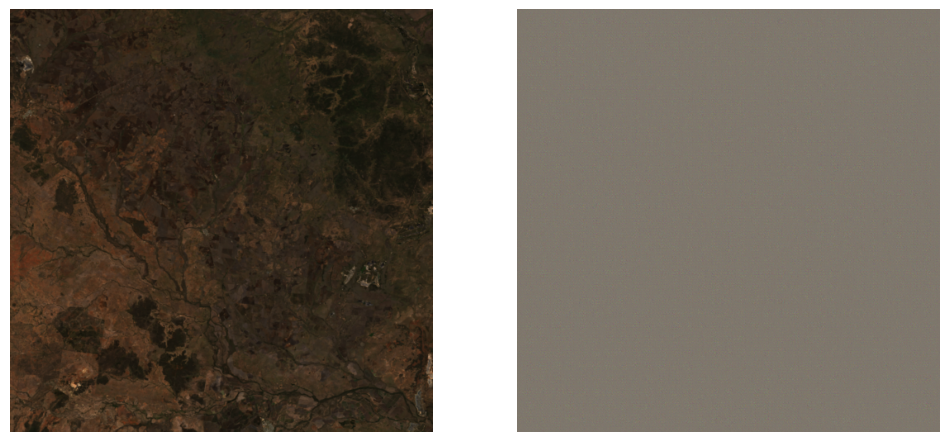

tensor(20085946., device='cuda:0')
tensor(401.4906, device='cuda:0')


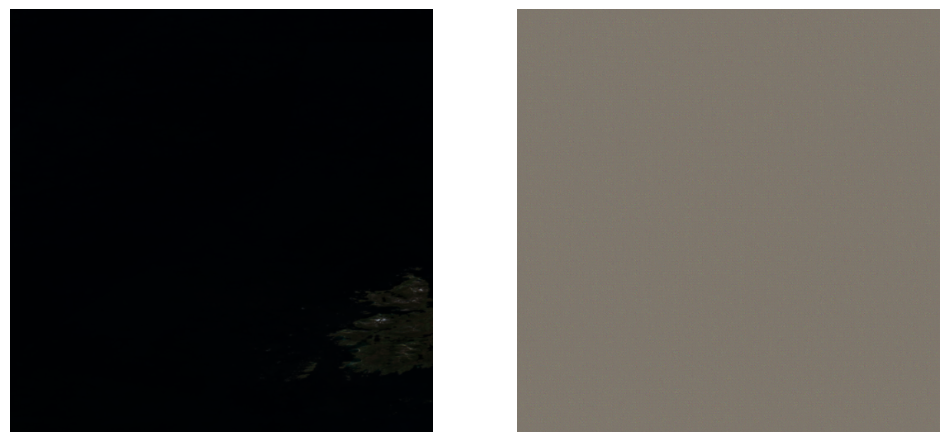

tensor(20125820., device='cuda:0')
tensor(365.4554, device='cuda:0')


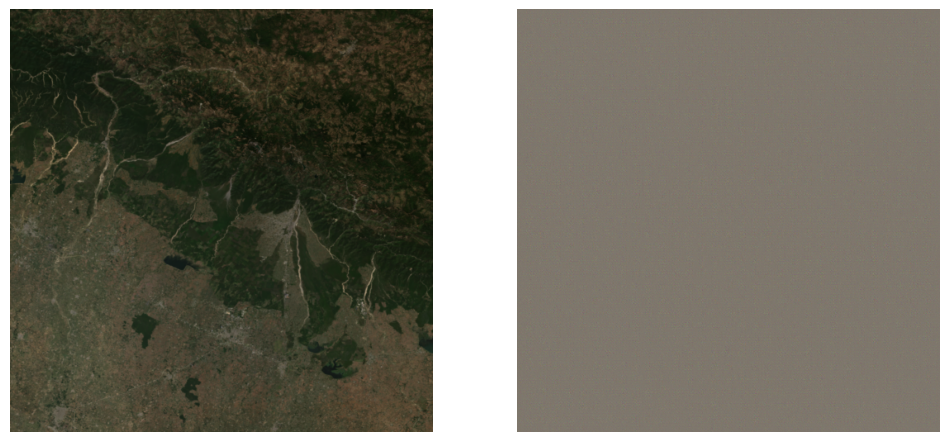

tensor(20131168., device='cuda:0')
tensor(372.0686, device='cuda:0')


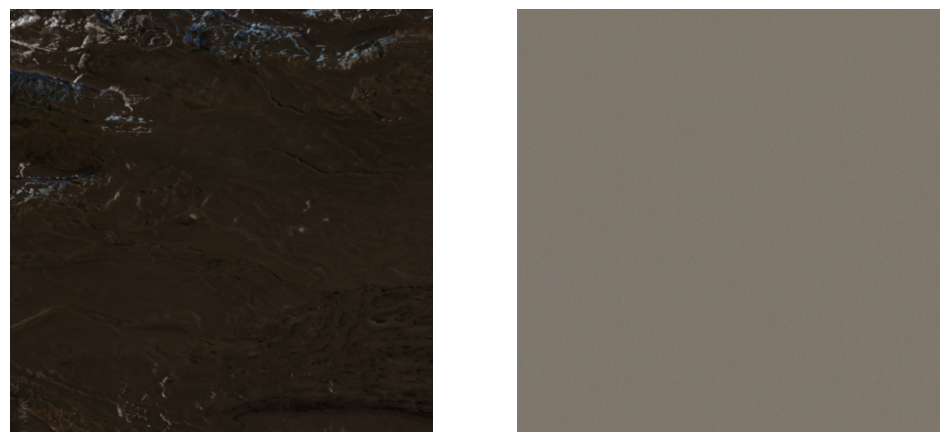

tensor(20069538., device='cuda:0')
tensor(374.0635, device='cuda:0')


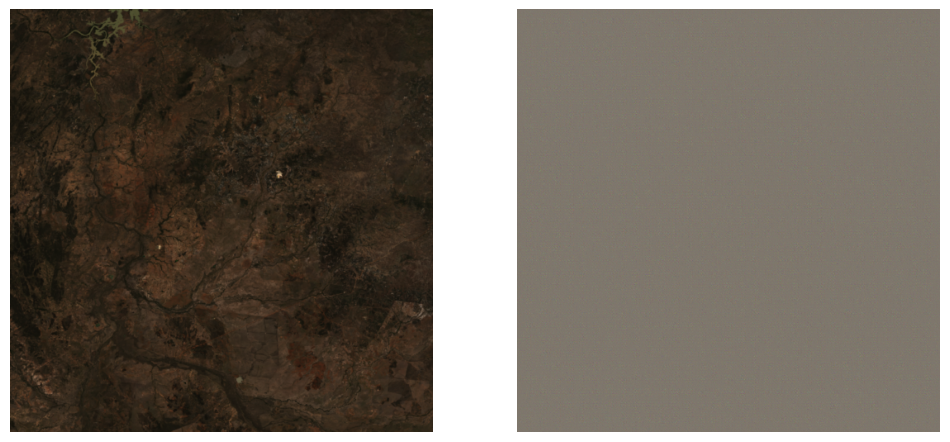

tensor(19927976., device='cuda:0')
tensor(370.2771, device='cuda:0')


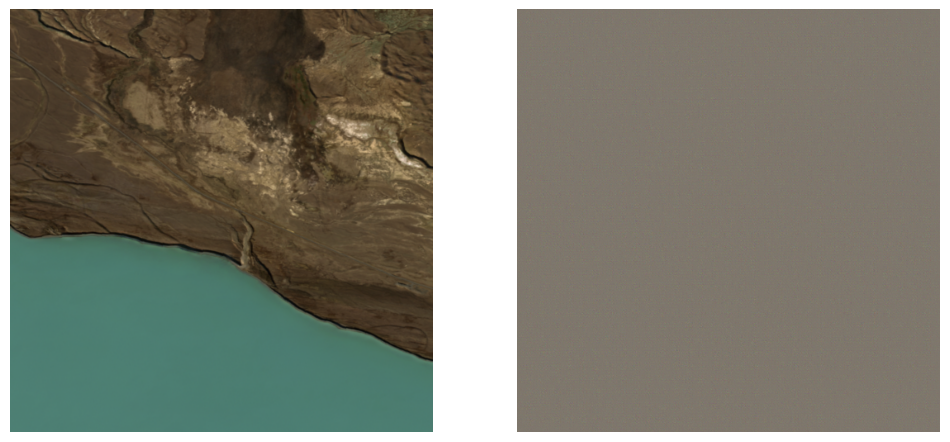

tensor(20072554., device='cuda:0')
tensor(396.6148, device='cuda:0')


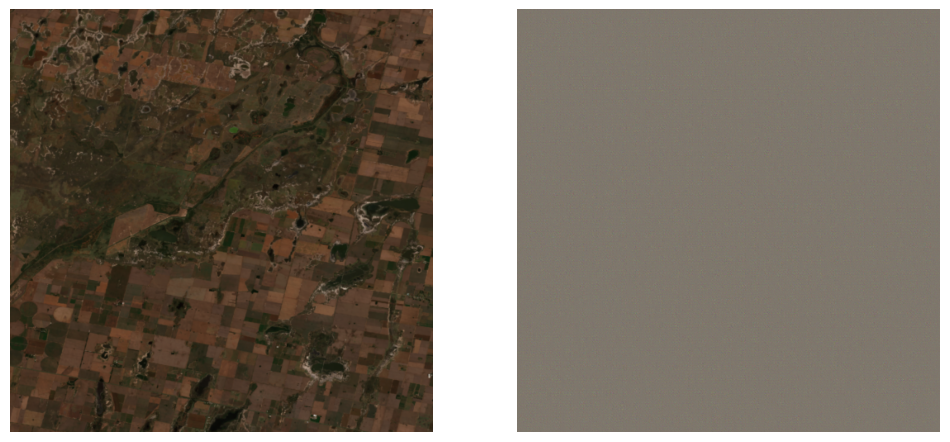

tensor(20201024., device='cuda:0')
tensor(431.4864, device='cuda:0')


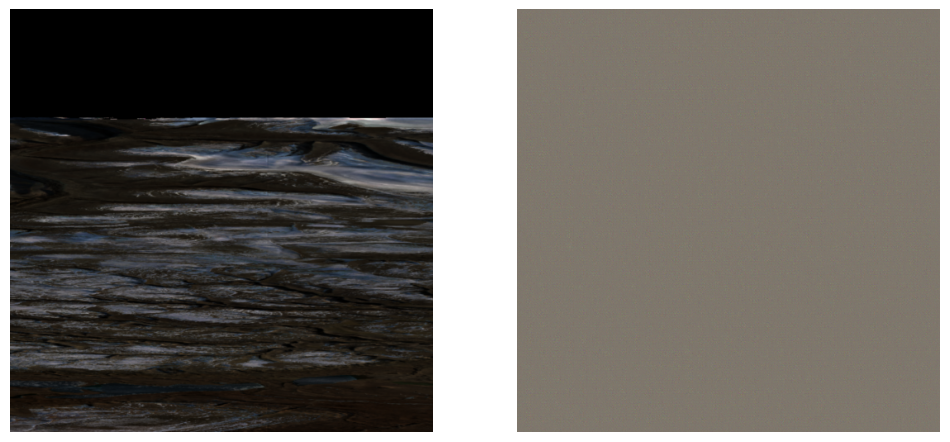

tensor(20190544., device='cuda:0')
tensor(431.9177, device='cuda:0')


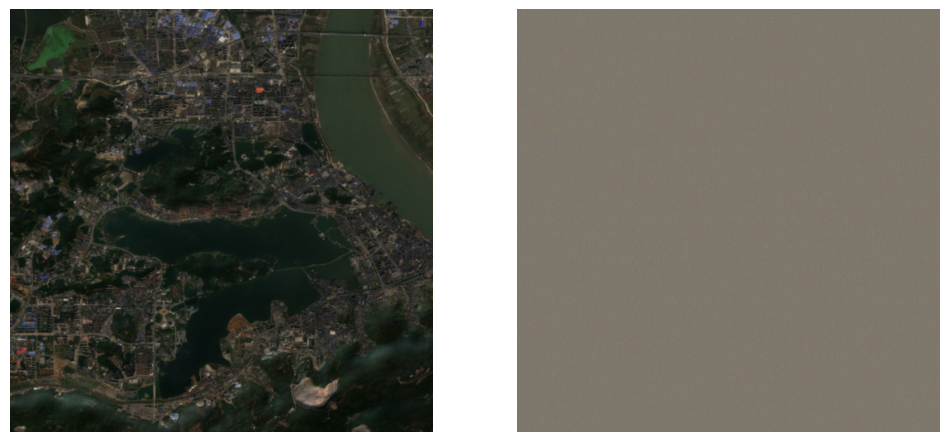

tensor(19748024., device='cuda:0')
tensor(372.5456, device='cuda:0')


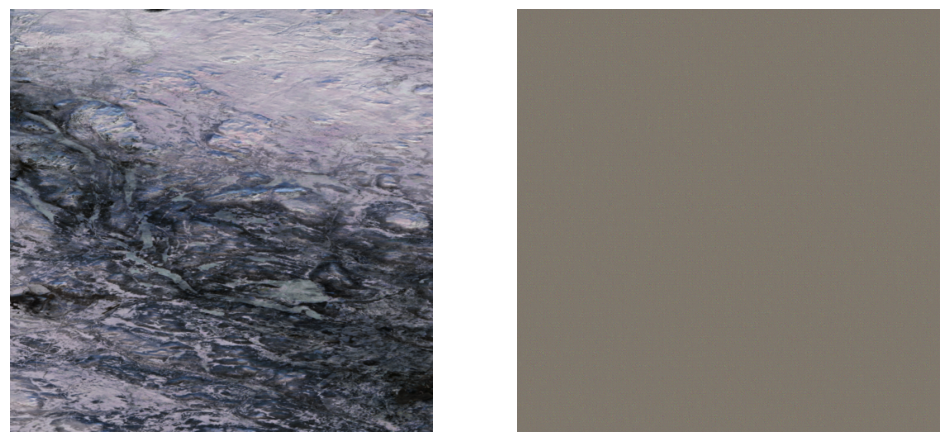

tensor(20161774., device='cuda:0')
tensor(422.4547, device='cuda:0')


KeyboardInterrupt: 

In [6]:
import torch.optim as optim
from torch.cuda.amp import GradScaler, autocast
import matplotlib.pyplot as plt
import random

# Check for CUDA availability and set the device accordingly
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Instantiate the model
model = VAE().to(device)

# Define the loss function
def vae_loss(recon_x_logits, x, mu, logvar):
    BCE = F.binary_cross_entropy_with_logits(recon_x_logits, x, reduction='sum')
    print(BCE)
    KLD = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
    print(KLD)
    return BCE + KLD


# Define the optimizer
optimizer = optim.Adam(model.parameters(), lr = 1e-3)

# Initialize the gradient scaler for mixed precision training
scaler = GradScaler()

# Training loop
def train_epoch(model, data_loader, optimizer, device, scaler):
    model.train()
    total_loss = 0
    for inputs in data_loader:
        #print(inputs[0,:,0,0])
        inputs = inputs.to(device)
        optimizer.zero_grad()

        with autocast():
            recon, mu, logvar = model(inputs)
            loss = vae_loss(recon, inputs, mu, logvar)

        scaler.scale(loss).backward()
        scaler.unscale_(optimizer)  # Unscale the gradients before clipping
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
        scaler.step(optimizer)
        scaler.update()

        total_loss += loss.item()
    return total_loss / len(data_loader)

# Validation loop
def validate_epoch(model, data_loader, device):
    model.eval()
    total_loss = 0
    with torch.no_grad():
        for inputs in data_loader:
            inputs = inputs.to(device)
            recon, mu, logvar = model(inputs)
            loss = vae_loss(recon, inputs, mu, logvar)
            idx = random.randint(0, inputs.shape[0] - 1)
            show_images_side_by_side((inputs[idx]).cpu(),(recon[idx]).cpu())
            #show_images_side_by_side((inputs[0,:,:,:]).cpu(), (recon[0,:,:,:]).cpu())
            total_loss += loss.item()
    return total_loss / len(data_loader)

def get_dataset_chunk(dataset, start_idx, chunk_size):
    end_idx = min(start_idx + chunk_size, len(dataset))
    return torch.utils.data.Subset(dataset, range(start_idx, end_idx))

def unnormalize(tensor):
    mean = torch.tensor([0.485, 0.456, 0.406])
    std = torch.tensor([0.229, 0.224, 0.225])
    """Reverses the normalization for visualization purposes."""
    for t, m, s in zip(tensor, mean, std):
        t.mul_(s).add_(m)  # Multiply by std and add mean
    return tensor

def show_images_side_by_side(tensor1, tensor2):
    """Displays two tensors as images side by side."""
    tensor1 = unnormalize(tensor1.clone().detach())  # Clone and detach for safety
    tensor2 = unnormalize(tensor2.clone().detach())

    tensor1 = tensor1.numpy().transpose((1, 2, 0))  # Convert from CxHxW to HxWxC
    tensor2 = tensor2.numpy().transpose((1, 2, 0))

    fig, axs = plt.subplots(1, 2, figsize=(12, 6))
    axs[0].imshow(tensor1)
    axs[0].axis('off')
    axs[1].imshow(tensor2)
    axs[1].axis('off')
    plt.show()

chunk_size = 100  # Define the size of each chunk
num_chunks = len(train_dataset) // chunk_size

best_val_loss = float('inf')
best_model_path = './best_model.pth'

num_epochs = 5  # Define the number of epochs
for epoch in range(num_epochs):
    for chunk_idx in range(num_chunks):
    # Get a chunk of the training dataset
        train_chunk = get_dataset_chunk(train_dataset, chunk_idx * chunk_size, chunk_size)
        train_loader_chunk = DataLoader(train_chunk, batch_size=batch_size, shuffle=True)

        # Train on the current chunk
        train_loss = train_epoch(model, train_loader_chunk, optimizer, device, scaler)
        print(f"Chunk {chunk_idx + 1}/{num_chunks}, Train Loss: {train_loss:.4f}")

        # Validate on the entire validation set
        val_loss = validate_epoch(model, val_loader, device)
        print(f"Chunk {chunk_idx + 1}/{num_chunks}, Validation Loss: {val_loss:.4f}")

        # Save the best model
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            torch.save(model.state_dict(), best_model_path)
        torch.cuda.empty_cache()




# Testing loop (similar to validation but using the test_loader)
"""def test_model(model, data_loader, device):
    model.eval()
    total_loss = 0
    with torch.no_grad():
        for inputs in data_loader:
            inputs = inputs.to(device)
            recon, mu, logvar = model(inputs)
            loss = vae_loss(recon, inputs, mu, logvar)
            total_loss += loss.item()
    return total_loss / len(data_loader)

# Run the test loop
test_loss = test_model(model, test_loader, device)
print(f"Test Loss: {test_loss:.4f}")"""


"""import matplotlib.pyplot as plt

def visualize_reconstructions(model, data_loader, device, num_images=10):
    model.load_state_dict(torch.load(best_model_path))
    model.to(device)
    model.eval()

    fig, axs = plt.subplots(2, num_images, figsize=(20, 4))
    with torch.no_grad():
        for i, inputs in enumerate(data_loader):
            if i >= num_images:
                break
            inputs = inputs.to(device)
            recon, _, _ = model(inputs)
            inputs = inputs.cpu().squeeze(0).permute(1, 2, 0)
            recon = recon.cpu().squeeze(0).permute(1, 2, 0)
            axs[0, i].imshow(inputs)
            axs[1, i].imshow(recon)
            axs[0, i].axis('off')
            axs[1, i].axis('off')
    plt.show()"""


In [6]:
model = VAE()
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

num_params = count_parameters(model)
print(num_params)

805725321


In [7]:
torch.cuda.empty_cache()

In [9]:
dataset[10].max()

tensor(1.0191)

In [11]:
import numpy as np
a = np.array([-0.1377, -0.6294, -0.8301])
b = np.array([0.1768, -0.5826, -0.9678])

def binary_cross_entropy_loss(y_true, y_pred):
    # Ensure the predicted values are in the range [1e-15, 1 - 1e-15] for numerical stability
    y_pred = np.clip(y_pred, 1e-15, 1 - 1e-15)

    # Calculate binary cross-entropy loss
    loss = -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
    return loss

print(binary_cross_entropy_loss(a,b))

-16.808865148211733


In [3]:
import os
from PIL import Image

def break_into_patches_and_save(image_path, patch_size, output_folder):
    # Get the base name of the image file
    base_name = os.path.basename(image_path)
    image_name = os.path.splitext(base_name)[0]
    count = 1
    # Open the image
    with Image.open(image_path) as img:
        img_width, img_height = img.size

        # Iterate over the grid
        for j in range(0, img_height, patch_size):
            for i in range(0, img_width, patch_size):
                # Define the bounding box
                bbox = (i, j, i + patch_size, j + patch_size)

                # Extract a patch
                patch = img.crop(bbox)

                # Skip incomplete patches
                if patch.size[0] != patch_size or patch.size[1] != patch_size:
                    continue

                # Save the patch
                patch_filename = os.path.join(output_folder, f'{image_name}_{count}.png')
                patch.save(patch_filename)
                count += 1

def process_folder(input_folder, output_folder, patch_size):
    # Ensure the output folder exists
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Process each image in the input folder
    for image_file in os.listdir(input_folder):
        if image_file.endswith('.png'):
            image_path = os.path.join(input_folder, image_file)
            break_into_patches_and_save(image_path, patch_size, output_folder)

# Main processing
root_folder = 'd:\ML\GeoSpatialAI\LEVIR-CD'
subfolders = ['A', 'B', 'label']
patch_size = 256

for subfolder in subfolders:
    input_folder = os.path.join(root_folder, subfolder)
    output_folder = os.path.join(root_folder, f'{subfolder}_patch')
    process_folder(input_folder, output_folder, patch_size)
    print(f"{subfolder} done")


A done
B done
label done
